In [7]:
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd # para desenhar/plotar as tabelas informando os status das peças em cada teste
import cv2

from Filtro_Grayscale_custom import grayscale_especial

In [8]:
img=cv2.imread("img/Fig_OK_01.jpg")

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

returns,thresh=cv2.threshold(gray,80,255,cv2.THRESH_BINARY)

contours,hierachy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

if len(contours) != 0:
    for i in range(len(contours)):
        if len(contours[i]) >= 800:
#blob
            cv2.drawContours(img,[contours[i]],-1,(0,255,0),2)
            ellipse = cv2.fitEllipse(contours[i])
            cv2.ellipse(img,ellipse, (0,0,255), 2)
            cv2.imshow('RGB',img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            cv2.waitKey(1)
            (x, y), (MA, ma), angle = ellipse
            if MA/ma>0.9 and MA/ma<1.1:
                print(MA + ma)
        else:
      # optional to "delete" the small contours
            cv2.drawContours(thresh,contours,-1,(0,0,0),-1)
 



786.5085144042969


Height =  468
Width =  508


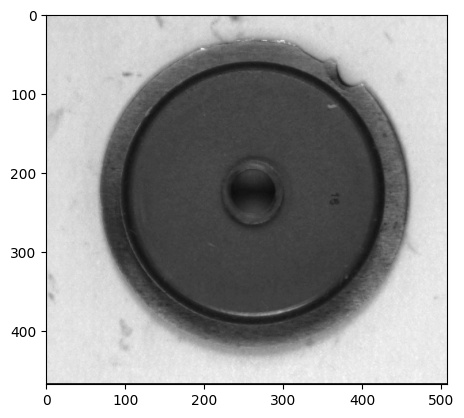

In [9]:
img_nok=cv2.imread("img 2/Fig_NOK_01.jpg",cv2.IMREAD_COLOR)

#gray=cv2.cvtColor(img_nok,cv2.COLOR_BGR2GRAY)
gray = grayscale_especial (img_nok,0.02,0.21,0.77)
cv2.imshow("title",gray)
cv2.waitKey(0)

plt.imshow(gray, cmap='gray')
plt.show()

img_bin = np.where(gray >97, 255, 0).astype("uint8")
returns,thresh=cv2.threshold(gray,97,255,cv2.THRESH_BINARY)

cv2.imshow("title",thresh)
cv2.waitKey(0)


contours,hierachy=cv2.findContours(img_bin,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

if len(contours) != 0:
    for i in range(len(contours)):
        if cv2.isContourConvex(contours[i]):
            
            # Draw the contour on the original image in green color
            cv2.drawContours(img_nok,[contours[i]],-1,(0,255,0),1)
            
            # Draw a circle at the centroid
            #cv2.circle(img_nok, (cx, cy), 5, (0, 0, 255), -1)
            
            # Compute the bounding box of the contour
            x,y,w,h = cv2.boundingRect(contours[i])

            # Draw the bounding box on the original image in blue color
            cv2.rectangle(img_nok,(x,y),(x+w,y+h),(255,0,0),2)
        
        else:
      # optional to "delete" the small contours
            cv2.drawContours(thresh,contours,-1,(0,0,0),-1)

cv2.imshow('Convexity Detection', img_nok)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
#interpretação das rubricas

#tamanho é o diametro
#forma é a relação a/b dos raios das elipses
#borda é as convexidade

# FIG NOK15 é uma bem dificil de detectar o erro

#Achar o erro do contorno:
#a partir da posição central da circunferencia comparar os pontos detectados do contorno com os pontos da circunferencia teórica